# Setup

In [1]:
# Common imports
import numpy as np
import os

# Make the notebook's output stable across runs
np.random.seed(42)

# Matplotlib setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import HTML, Image
from matplotlib.animation import FuncAnimation
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# For saving things
from joblib import dump, load

# Linear SVM Classification

Used on data sets whose classes are _linearly seperable_.  See first plot's below for visualization.

SVMs are:
* Well suited for small to medium sized data sets
* Can be used for linear or nonlinear classification
* Can be used for linear or nonlinear regression

In [2]:
# From the book's gitub

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

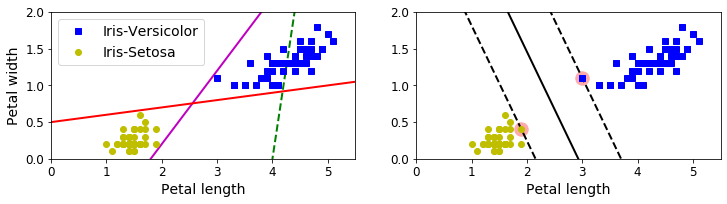

In [3]:
# From the book's github

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#save_fig("large_margin_classification_plot")
plt.show()

__Important__

The features should be scaled.  SVMs are very sensitive to features whose scales are different.  See plots below:

[-2, 2, -2, 2]

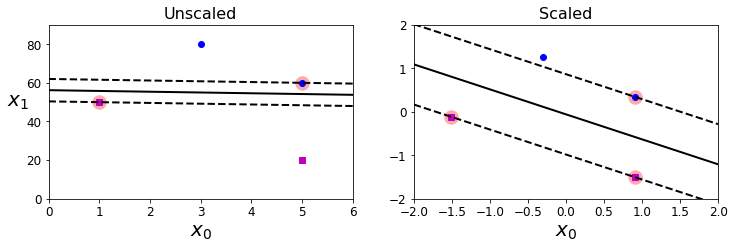

In [4]:
# From book's github

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

#save_fig("sensitivity_to_feature_scales_plot")


# Soft Margin Classification

Keep the street as wide as possible, but allow _margin violations_, i.e. classes within the dashed lines shown above.

In contrast, _hard margin classification_ does not allow margin violations.  Hard margin classification has the following two issues:
* Sensitive to outliers
* Only works if data is linearly separable

In [5]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [6]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [7]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [9]:
# TODO - Plot the original data (what is and isn't the positive class)
# TODO - Plot the decision boundary of the svm_clf["linear_svc"] - 
#  SEE plot_svc_decision_boundary in the book's github

In [10]:
#LinearSVC??

# Nonlinear SVM Classification

Many data sets are not linearly separable.  Adding polynomial features can transform a data set that is not linearly separable into one that is.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# The book completely leaves out this and the plot of this.

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)



In [13]:
X

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445],
       [ 0.38220326,  0.76957897],
       [-0.32279169,  0.92145523],
       [ 1.29900621, -0.64914275],
       [-0.63569974,  0.91873422],
       [ 1.96899387,  0.297549  ],
       [ 1.21073294,  0.37721455],
       [ 1.13998191, -0.36088456],
       [ 1.06805159, -0.53460667],
       [ 0.49598571,  0.66135542],
       [-0.26038715,  0.88295876],
       [-0.06516219,  0.13092506],
       [ 1.87005845, -0.18659309],
       [ 0.03146515,  0.79868048],
       [-1.03151461,  0.35788726],
       [ 0.45814234,  0.00308109],
       [ 0.40767679,  0.9574049 ],
       [-0.9379972 ,  0.46846678],
       [ 2.02675758,  0.09006383],
       [ 0.73867736,

In [14]:
X[:, 0]

array([ 1.61383833,  0.08984723,  0.74721047, -1.10174514, -0.72871455,
       -0.65891281,  0.22828266,  1.39439184,  0.87158283,  0.88304472,
        0.38220326, -0.32279169,  1.29900621, -0.63569974,  1.96899387,
        1.21073294,  1.13998191,  1.06805159,  0.49598571, -0.26038715,
       -0.06516219,  1.87005845,  0.03146515, -1.03151461,  0.45814234,
        0.40767679, -0.9379972 ,  2.02675758,  0.73867736,  0.71349755,
        0.92445501, -1.05805492,  1.80904221, -0.17181754,  2.22167197,
        0.8346617 ,  0.28332589,  0.40728969, -0.6303002 ,  0.59525613,
       -0.99578508, -0.45366574,  0.73645602,  2.10042161, -0.26764459,
        0.32384572,  1.59212445,  0.14332957,  0.31249817,  0.51814426,
       -0.22452786,  1.131632  ,  0.3723287 , -0.63902305,  0.82849531,
        1.3506206 ,  1.01195087,  0.35506156, -0.64970203,  1.60190251,
        0.27455847,  1.85601581,  0.12784118, -1.12470228,  0.04738364,
        0.67403854, -1.27201559,  0.79988167,  0.18258616,  2.40

In [15]:
X[:, 1]

array([-0.49115086,  0.50439056, -0.36911116,  0.23685641,  0.14652347,
        0.857088  ,  0.73453868, -0.45063627,  0.70852888, -0.12658445,
        0.76957897,  0.92145523, -0.64914275,  0.91873422,  0.297549  ,
        0.37721455, -0.36088456, -0.53460667,  0.66135542,  0.88295876,
        0.13092506, -0.18659309,  0.79868048,  0.35788726,  0.00308109,
        0.9574049 ,  0.46846678,  0.09006383,  0.52356398, -0.61055519,
        0.79897643,  0.1152524 , -0.49580332,  1.27111359, -0.16625369,
        0.34040713, -0.45537977, -0.10997402,  0.81437199,  0.93666607,
       -0.17956306,  0.88489567,  0.3315385 ,  0.33716789,  0.94669172,
        1.03101899, -0.40456525,  1.13048376, -0.41220505,  0.85146409,
        1.01733299,  0.21402176,  0.75960715,  0.71898449,  0.65051142,
       -0.20663883,  0.35059194, -0.57201701,  0.73792076, -0.10190367,
        0.01455085,  0.66573923,  0.7055097 ,  0.48332509,  0.50889219,
       -0.39105811,  0.064055  , -0.23860829, -0.07268884,  0.36

In [16]:
[y==0]

[array([False, False, False,  True,  True,  True,  True, False,  True,
         True,  True,  True, False,  True, False,  True, False, False,
         True,  True, False, False,  True,  True, False,  True,  True,
        False,  True, False,  True,  True, False,  True, False,  True,
        False, False,  True,  True,  True,  True,  True, False,  True,
         True, False,  True, False,  True,  True,  True,  True,  True,
         True, False,  True, False,  True, False, False, False, False,
         True, False, False,  True, False, False, False, False,  True,
        False,  True, False, False, False,  True, False, False, False,
        False,  True,  True,  True, False,  True,  True,  True, False,
        False, False, False, False,  True, False, False,  True, False,
        False])]

In [17]:
X[:, 0][y==0]

array([-1.10174514, -0.72871455, -0.65891281,  0.22828266,  0.87158283,
        0.88304472,  0.38220326, -0.32279169, -0.63569974,  1.21073294,
        0.49598571, -0.26038715,  0.03146515, -1.03151461,  0.40767679,
       -0.9379972 ,  0.73867736,  0.92445501, -1.05805492, -0.17181754,
        0.8346617 , -0.6303002 ,  0.59525613, -0.99578508, -0.45366574,
        0.73645602, -0.26764459,  0.32384572,  0.14332957,  0.51814426,
       -0.22452786,  1.131632  ,  0.3723287 , -0.63902305,  0.82849531,
        1.01195087, -0.64970203, -1.12470228, -1.27201559, -0.78027235,
       -0.94748558, -0.29808882, -0.81839086, -0.18600799,  0.82045555,
        0.23277362,  1.27522216, -0.04098885,  0.53409306,  0.51358597])

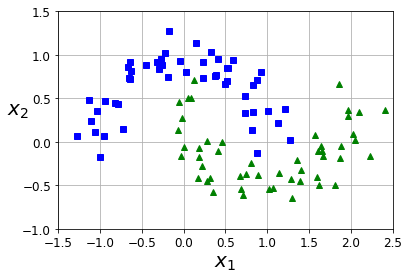

In [18]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

C:\Users\stidham\AppData\Local\Continuum\anaconda3\envs\envs\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

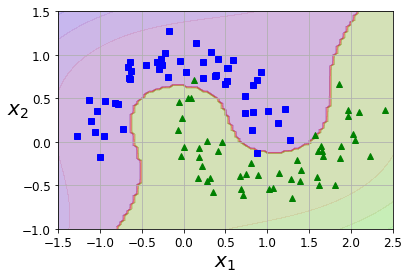

In [20]:
# From the book github

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

The _kernel trick_ : Get a result that would require a high degree polynomial model without having to add the features.

In [21]:
from sklearn.svm import SVC

In [22]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [23]:
# From book github

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

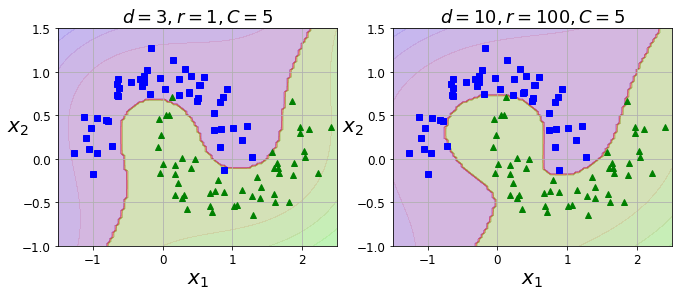

In [24]:
# From book github

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Adding Similarity Features

Just like adding polynomial features is a way to transform a data set into something that is linear separable, so is the following technique.

Mark certain instances as _landmarks_ and define a _similarity_ function to determine how much each instance resembles a landmark.

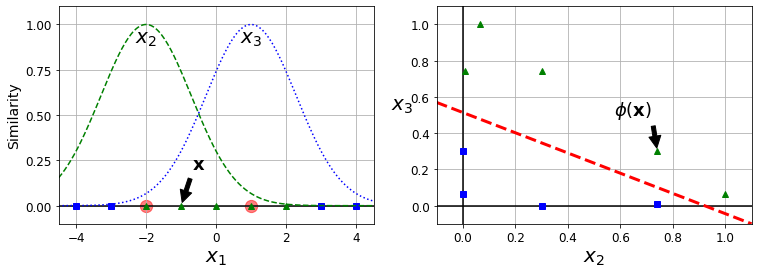

In [25]:
# From the book's github

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

#save_fig("kernel_method_plot")
plt.show()

Above on the left, the data is all on a straight line.  On the right, the data has been made linearly separable using a the following _Gaussian RBF_ similarity function.  The curves on the left graph are the new axes on the right graph.  Looking at the left graph the blue boxes will be low on one axis or the other, while the green triangles are high on both.


__Gaussian RBF similarity function__:

${\phi}_{\gamma}(X, \ell) = exp({\gamma}{\|x-\ell\|}^2)$

* $\ell$ is a landmark value
* $x$ is an instance value ($x_1$ on the right hand graph)
* $X$ is the matrix on instances
* $\gamma$ is hyperparameter
 * If your model is overfitting, then reduce it
 * If your model is underfitting, then increase it

How are landmarks selected?
* Create a landmark for every instance in the training set
* The transformed data set will have m features and m instances
 * Unless you keep the original features, in which case it will have more than m features

## Gaussian RBF Kernel

Just like the polynomial kernel, this kernel allows you to obtain results as though many similiarity features were added, but without actually adding them.

In [26]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

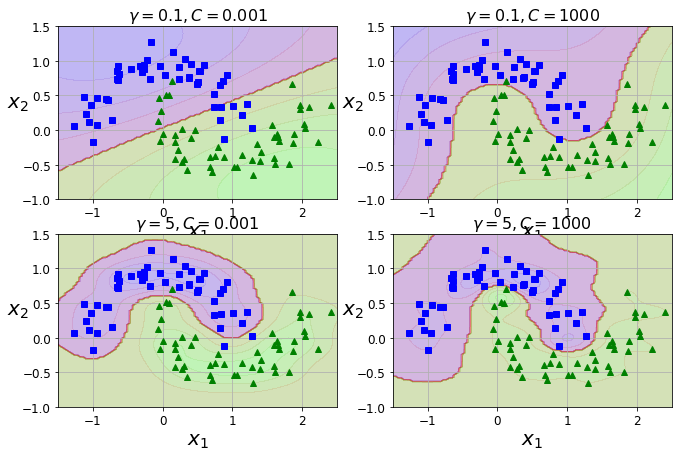

In [27]:
# From book github

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

#save_fig("moons_rbf_svc_plot")
plt.show()

## Computational Complexity

* LinearSVC
 * Implements an optimized algorithm for _linear_ SVMs
 * Does not support the kernel trick
 * Scales (almost) linearly with the number of training instances
 * Training time: $O(m x n)$
   * m is the number of instances, n is the number of features
 * Takes longer if high precision is required (controlled by $\epsilon$, a.k.a. tol in sklearn)
   * Default precision is fine for most classification tasks
 * Scaling of input features is required
 * No out of core support
* SVC class
 * Supports the kernel trick
 * Scales well with the number of features, but not the number of instances
   * $O(m^2 x n)\, to\, O(m^3 x n)$
 * Perfect for small to medium complex data sets
   * Scaling of input features is required
 * No out of core support
 

# SVM Regression

In addition to linear and nonlinear classification, the SVM algorithm supports linear and nonlinear regression.  It does so by trying to fit as many instances into the "street", as opposed to trying to create the widest street between instances in classification.  The width of the street is controlled by $\epsilon$ (not tol in sklearn LinearSVR class).

Adding training instances will not impact the models predictions, so the model is said to be $\epsilon$ insensitive (see plot's below).  Basically, I think this means more training instances don't improve the predictive power because the street will be a set size.

The LinearSVR class is used to perform __linear__ SVM regression.

In [28]:
# From book github

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [29]:
# This code from the book is how to do SVM regression in sklearn.
# Note the parameters in the printout below.

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [30]:
# From book github
# Plot these below to view different epsilon's.

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

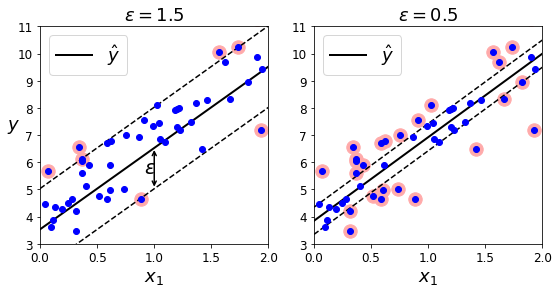

In [31]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
#save_fig("svm_regression_plot")
plt.show()

For __nonlinear__ regression tasks, the kernelized SVM model can be used.

In the plots below, a large C value is less regularization and a small C value is more regularization.

In [32]:
# From book github
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [33]:
# From book github

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
# From book github

from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

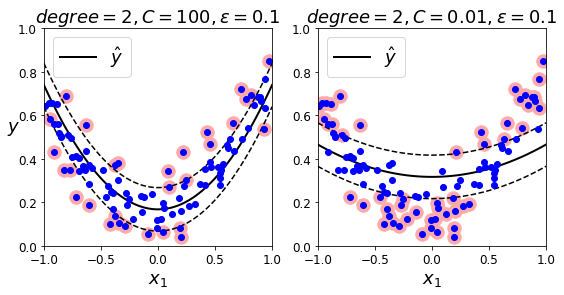

In [35]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
#save_fig("svm_with_polynomial_kernel_plot")
plt.show()

SVMs can also be used to detect outliers (see sklearn docs).

# Under the Hood

## Decision Function and Predictions

The _linear_ SVM classifier is a binary classifier.  It computes a decision function of the form $w^Tx + b$.  If the result is positive, then the predicted class is the positive class.  Else, the predicted class is the negative class.

The slope of the decision function is equal to the norm of the weight vector (just accepting this statement as-is).  Dividing the slope of the decision function by two means the points that intersect the margins ((-1, 1) in this case) will be twice as far away from the decision boundary.  See plot below:

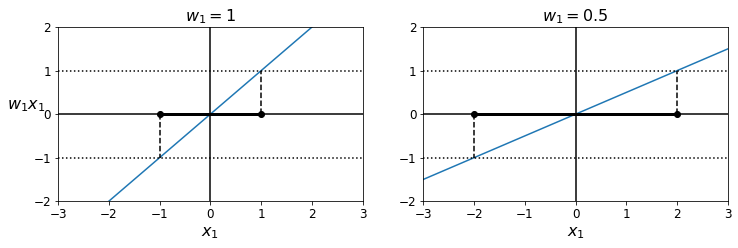

In [36]:
# From book github

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
#save_fig("small_w_large_margin_plot")
plt.show()

In the graphs above, the solid vertical line is the decision boundary.  The blue line is the slope of the decision function, i.e. the norm of the weight vector.  The margins are at -1 and 1.

Remember, the goal in SVM classification is to make the margins as large as possible.

Dividing the slope of the decision function (norm of the weight vector) by 2 means the points that intersect the margins are twice as far away.  In other words, the margins are multiplied by 2.

For hard margin classification (classification where no instances are in the street), we need all positive class predictions to be greater than 1 and all negative class predictions to be less the -1.

Hard margin classification can be expressed as a _constrained optimization_ problem.

See book for math.

# Quadratic Programming

Hard margin and soft margin problems are convenx quadratic optimization problems with linear constraints.  These types of problems are known as quadratic programming problems.  These types of problems are outside the scope of the book.  See the book for an intro to the math.

# The Dual Problem

SVM problems can be expressed in two ways: the primal problem and the dual problem.  The dual problem is faster to solve when the number of training instances is smaller than the number of features.  Also, it makes the kernel trick possible.

See appendix C for how to derive the dual problem given the primal problem.

# Kernalized SVM

"In Machine Learning, a _kernel_ is a function capable of computing the dot product $\phi{(a)}^T\phi(b)$ based only on the original vectors $a$ and $b$, without having to compute (or even to know about) the transformation $\phi$. (pg. 164)

The application of this is that training instances don't need to be transformed by adding features.  Instead, the features can be calculated from the original instances.

__Does anyone else have additional insight?__

The following are common kernels:
* Linear
* Polynomial
* Gaussian RBF
* Sigmoid

# Online SVMs

For linear SVM classifiers SGD can be used.  However, it converges more slowly than the methods based on quadratic programming.

Kernalized online SVMs are also possible.

For large-scale nonlinear problems, you may want to consider neural nets instead.